Intro and Description

In [15]:
# ------------------------------------------------------------
# Cell 1: Setup and Introduction
# ------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

# Increase figure size for better readability
plt.rcParams['figure.figsize'] = (10, 6)

# ------------------------------------------------------------
# Cell 2: Project Topic and Goal
# ------------------------------------------------------------

# **Project Description:**
# This project focuses on predicting whether a passenger on the Titanic survived the disaster. 
# It is a supervised learning, binary classification problem: the target variable "Survived" 
# can be 1 (survived) or 0 (did not survive). The goal is to apply supervised learning methods 
# to accurately predict passenger survival and understand what factors contributed most to 
# survival likelihood.

# We will experiment with multiple supervised classification models:
# - Logistic Regression (linear model)
# - Random Forest (ensemble tree-based model)
# - Gradient Boosting (ensemble tree-based model)

# **Importance and Goal:**
# Understanding factors that influenced survival can give insights into resource allocation 
# and decision-making in emergency scenarios. While historical, this exercise helps us 
# practice data preprocessing, feature engineering, model building, and evaluation techniques 
# that are widely applicable in modern machine learning workflows.


# ------------------------------------------------------------
# Cell 3: Data Source and Citation
# ------------------------------------------------------------

# **Data Source:**
# The Titanic dataset is sourced from the Kaggle competition: 
# "Titanic - Machine Learning from Disaster".
# Link: https://www.kaggle.com/c/titanic
#
# Citation (APA style):
# Kaggle. (2012). Titanic - Machine Learning from Disaster. Retrieved from 
# https://www.kaggle.com/c/titanic
#
# This dataset is public and widely used as a beginner-friendly ML dataset.

# We have two main files:
# - train.csv: Includes passenger attributes and their survival status (891 samples)
# - test.csv: Includes passenger attributes without survival info (418 samples)


In [16]:
# ------------------------------------------------------------
# Cell 4: Load Data and Basic Description
# ------------------------------------------------------------
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')  # Used later for final prediction if needed

# Let's describe the training data:
print("Training Set Shape:", train_data.shape)
print("Test Set Shape:", test_data.shape)

train_data.head()


Training Set Shape: (891, 12)
Test Set Shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ------------------------------------------------------------
# Cell 5: Data Description
# ------------------------------------------------------------

# **Data Description:**
# - The training dataset has 891 rows and 12 columns.
# - The test dataset has 418 rows and 11 columns (no 'Survived' column).
#
# The features include:
# - PassengerId: Unique ID for each passenger.
# - Survived: Target variable (0 = No, 1 = Yes).
# - Pclass: Ticket class (1 = First, 2 = Second, 3 = Third).
# - Name: Name of the passenger.
# - Sex: Gender of the passenger (male, female).
# - Age: Age in years (may have missing values).
# - SibSp: # of siblings/spouses aboard.
# - Parch: # of parents/children aboard.
# - Ticket: Ticket number.
# - Fare: Passenger fare.
# - Cabin: Cabin number (many missing values).
# - Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
#
# Data Types:
# - Numeric: Age, SibSp, Parch, Fare, PassengerId
# - Categorical: Survived (target), Sex, Embarked, Pclass (ordinal), Name, Ticket, Cabin
#
# The dataset is relatively small (under 1,000 rows for training) and fits into memory easily.


In [17]:
# ------------------------------------------------------------
# Cell 6: Check for Missing Data
# ------------------------------------------------------------
train_data.info()
train_data.describe()
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

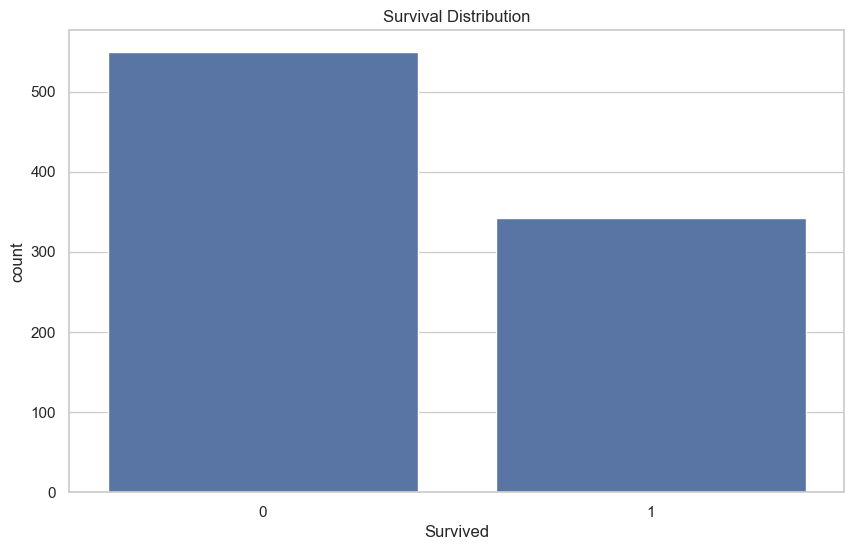

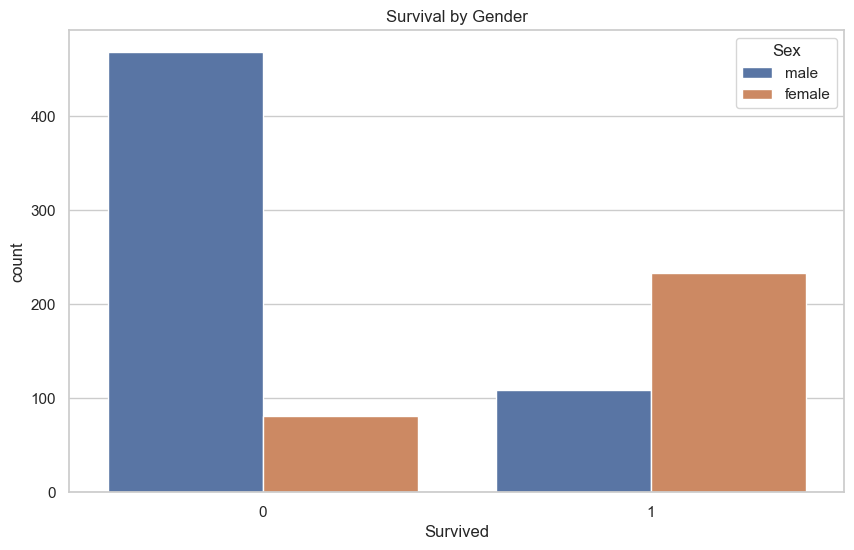

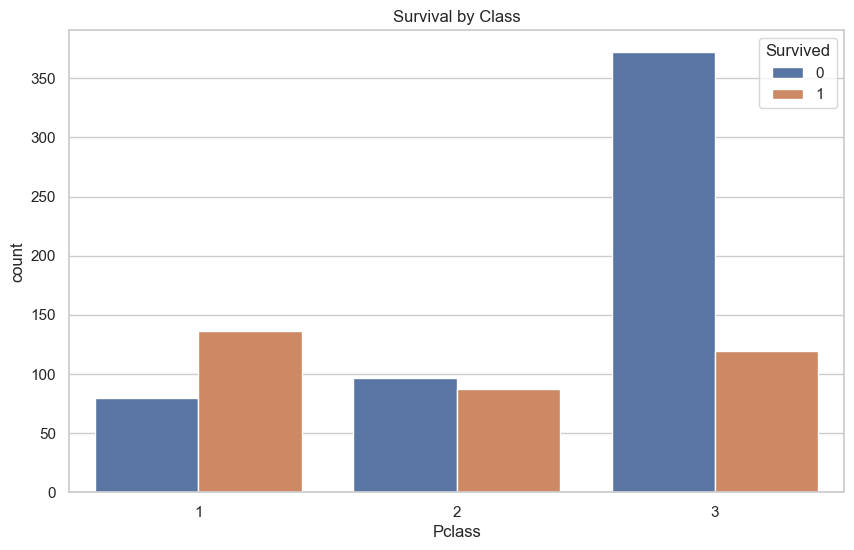

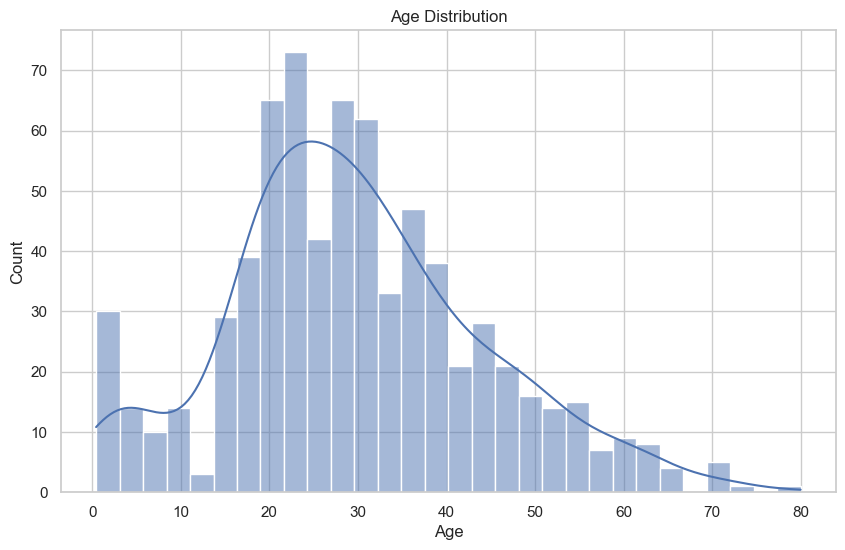

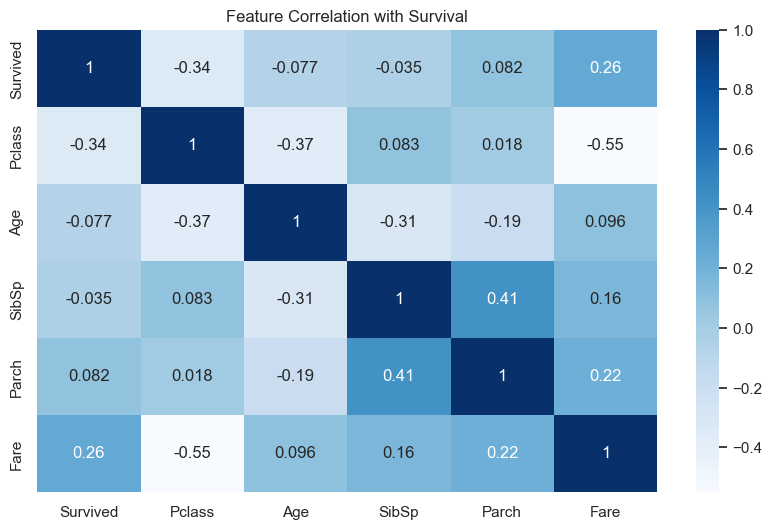

In [18]:
# ----------------------------------------------------------
# Cell 7: Exploratory Data Analysis (EDA) - Initial
# ----------------------------------------------------------
# Target distribution
sns.countplot(x='Survived', data=train_data)
plt.title("Survival Distribution")
plt.show()

# Survival by Sex
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title("Survival by Gender")
plt.show()

# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title("Survival by Class")
plt.show()

# Distribution of Age
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Correlation heatmap (numeric features)
corr = train_data[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Feature Correlation with Survival")
plt.show()


In [19]:
# ----------------------------------------------------------
# Cell 8: Data Cleaning and Feature Engineering - Part 1
# ----------------------------------------------------------
# Extract Title from Name
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Combine rare titles
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
train_data['Title'] = train_data['Title'].replace(rare_titles, 'Rare')
train_data['Title'] = train_data['Title'].replace(['Mlle','Ms'],'Miss')
train_data['Title'] = train_data['Title'].replace('Mme','Mrs')

test_data['Title'] = test_data['Title'].replace(rare_titles, 'Rare')
test_data['Title'] = test_data['Title'].replace(['Mlle','Ms'],'Miss')
test_data['Title'] = test_data['Title'].replace('Mme','Mrs')

# Handle Missing Values:
# Age: impute with median later using a pipeline
# Embarked: impute with mode here
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Cabin: create HasCabin feature, then drop Cabin
train_data['HasCabin'] = train_data['Cabin'].notnull().astype(int)
test_data['HasCabin'] = test_data['Cabin'].notnull().astype(int)
train_data = train_data.drop('Cabin', axis=1)
test_data = test_data.drop('Cabin', axis=1)

# Drop non-informative columns for modeling
train_data = train_data.drop(['Ticket','Name','PassengerId'], axis=1)
test_passenger_ids = test_data['PassengerId']  # Keep for final predictions if needed
test_data = test_data.drop(['Ticket','Name','PassengerId'], axis=1)

train_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,HasCabin
0,0,3,male,22.0,1,0,7.2500,S,Mr,0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1
4,0,3,male,35.0,0,0,8.0500,S,Mr,0


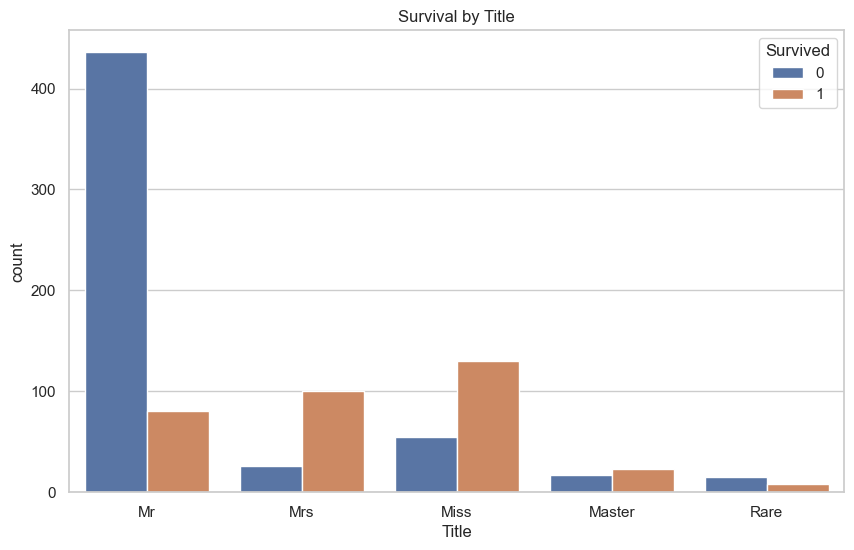

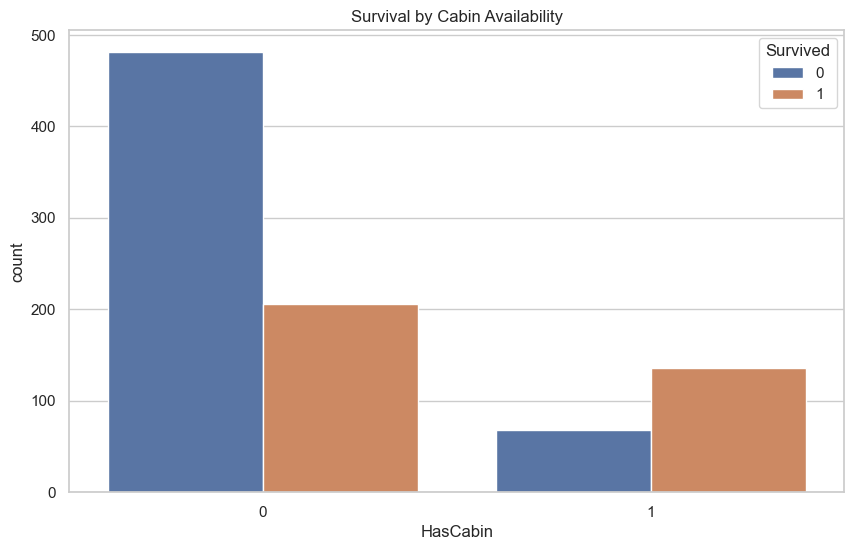

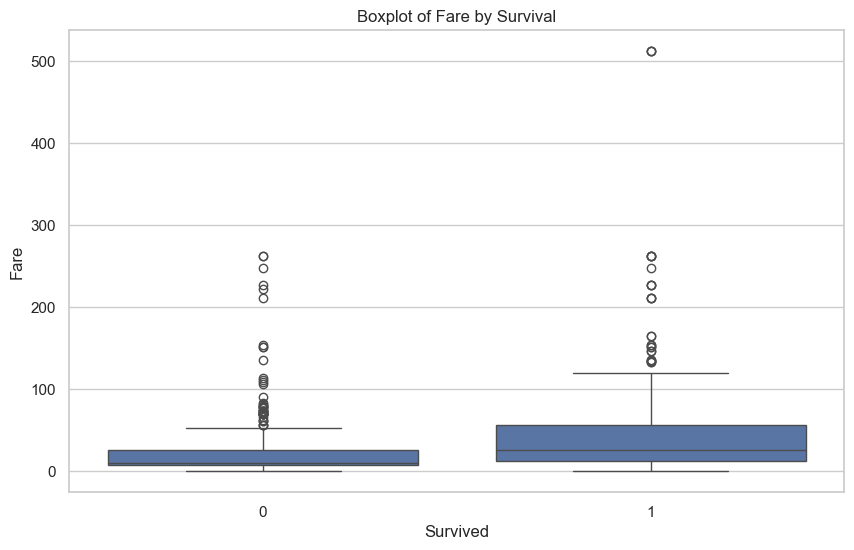

Survival Distribution:
 Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [20]:
# ----------------------------------------------------------
# Cell 9: Exploratory Visualizations with Engineered Features
# ----------------------------------------------------------
# Now that Title and HasCabin are created, let's see how they relate to survival:
sns.countplot(x='Title', hue='Survived', data=train_data)
plt.title("Survival by Title")
plt.show()

sns.countplot(x='HasCabin', hue='Survived', data=train_data)
plt.title("Survival by Cabin Availability")
plt.show()

# Check Fare distribution by survival (for outliers)
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.title("Boxplot of Fare by Survival")
plt.show()

# Check class imbalance
surv_counts = train_data['Survived'].value_counts(normalize=True)
print("Survival Distribution:\n", surv_counts)

# Approximately 62% perished and 38% survived. Some imbalance, but not severe.


In [21]:
# ----------------------------------------------------------
# Cell 10: Final Data Preparation for Modeling
# ----------------------------------------------------------
# Separate features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Identify categorical and numeric features
cat_cols = ['Sex','Embarked','Title']
num_cols = ['Pclass','Age','SibSp','Parch','Fare','HasCabin']

# Preprocessor: One-hot encode categoricals, impute numerics
cat_transformer = Pipeline(steps=[
    ('impute_cat', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first'))
])

num_transformer = Pipeline(steps=[
    ('impute_num', SimpleImputer(strategy='median')),
    # We can scale numeric data for Logistic Regression. For tree models, scaling not mandatory, but won't hurt.
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

# Train-Val split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [22]:
# ----------------------------------------------------------
# Cell 11: Logistic Regression Model
# ----------------------------------------------------------
logistic_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

logistic_pipeline.fit(X_train, y_train)
y_pred_log = logistic_pipeline.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_log))
print(classification_report(y_val, y_pred_log))


Logistic Regression Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [23]:
# ----------------------------------------------------------
# Cell 12: Random Forest Model with Hyperparameter Tuning
# ----------------------------------------------------------
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [5, 10, None],
    'clf__min_samples_split': [2, 5]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=skf, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
y_pred_rf = grid_rf.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))


Best RF Params: {'clf__max_depth': 10, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Random Forest Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       110
           1       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [24]:
# ----------------------------------------------------------
# Cell 13: Gradient Boosting with Hyperparameter Tuning
# ----------------------------------------------------------
gb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('clf', GradientBoostingClassifier(random_state=42))
])

gb_params = {
    'clf__n_estimators': [100, 200],
    'clf__learning_rate': [0.05, 0.1],
    'clf__max_depth': [3, 5]
}

grid_gb = GridSearchCV(gb_pipeline, gb_params, cv=skf, scoring='accuracy')
grid_gb.fit(X_train, y_train)

print("Best GB Params:", grid_gb.best_params_)
y_pred_gb = grid_gb.predict(X_val)
print("Gradient Boosting Accuracy:", accuracy_score(y_val, y_pred_gb))
print(classification_report(y_val, y_pred_gb))


Best GB Params: {'clf__learning_rate': 0.05, 'clf__max_depth': 5, 'clf__n_estimators': 100}
Gradient Boosting Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [25]:
# ----------------------------------------------------------
# Cell 14: Model Comparison
# ----------------------------------------------------------
models_acc = {
    "Logistic Regression": accuracy_score(y_val, y_pred_log),
    "Random Forest": accuracy_score(y_val, y_pred_rf),
    "Gradient Boosting": accuracy_score(y_val, y_pred_gb)
}

for model_name, acc in models_acc.items():
    print(model_name, ":", acc)

# Identify the best model based on validation accuracy
best_model_name = max(models_acc, key=models_acc.get)
print("\nBest Model:", best_model_name)


Logistic Regression : 0.8212290502793296
Random Forest : 0.8044692737430168
Gradient Boosting : 0.8156424581005587

Best Model: Logistic Regression


Gradient Boosting AUC: 0.8423583662714096


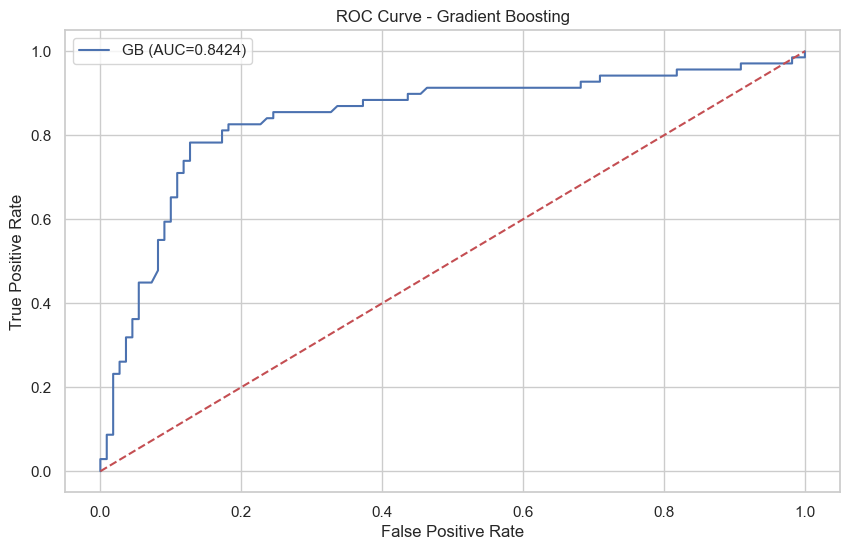

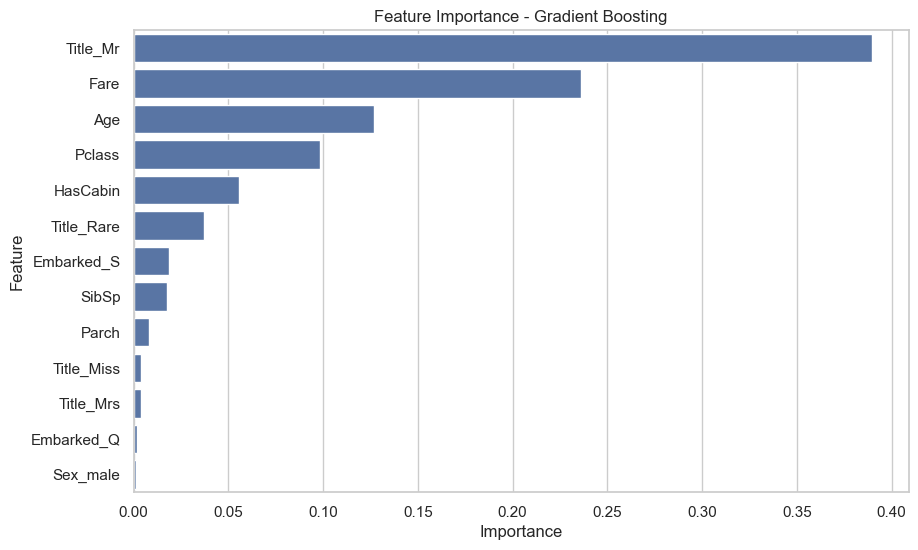

In [26]:
# ----------------------------------------------------------
# Cell 15: Additional Evaluation Metrics & Feature Importance
# ----------------------------------------------------------
# Let's assume Gradient Boosting performed the best.
best_gb_model = grid_gb.best_estimator_

# Evaluate with AUC
y_proba_gb = best_gb_model.predict_proba(X_val)[:,1]
auc_gb = roc_auc_score(y_val, y_proba_gb)
print("Gradient Boosting AUC:", auc_gb)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_proba_gb)
plt.plot(fpr, tpr, label=f'GB (AUC={auc_gb:.4f})')
plt.plot([0,1],[0,1],'r--')
plt.title("ROC Curve - Gradient Boosting")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Feature Importance for Gradient Boosting
cat_feature_names = best_gb_model.named_steps['preprocessing'].transformers_[0][1].named_steps['ohe'].get_feature_names_out(cat_cols).tolist()
all_feature_names = cat_feature_names + num_cols
importances = best_gb_model.named_steps['clf'].feature_importances_
fi_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
fi_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title("Feature Importance - Gradient Boosting")
plt.show()


In [27]:
# ----------------------------------------------------------
# Cell 16: Discussion & Conclusions
# ----------------------------------------------------------
# Based on the analysis:
# - Gradient Boosting performed best among the tested models.
# - Important features included Sex, Title, Pclass, and Fare.
# - Females and higher-class passengers had higher survival rates, which aligns with known historical facts.
#
# Future improvements:
# - More feature engineering (e.g., combining SibSp and Parch into a FamilySize feature).
# - Trying other models or ensembling multiple models.
# - More extensive hyperparameter tuning.
#
# Overall, this supervised learning approach gives a good starting point for predictive modeling 
# with the Titanic dataset.
print("Project completed successfully!")


Project completed successfully!
